In [1]:
import numpy as np
import tensorflow as tf
import h5py
import matplotlib.pyplot as plt

In [2]:
from utils.get_svhn import *

In [3]:
# download SVHN dataset

download_svhn(phase="all")

Start downloading training data.
Complete downloading training data.
Start downloading test data.
Complete downloading test data.
Start downloading extra data.
Complete downloading extra data.


In [4]:
# untar SVHN dataset

untar_svhn(phase="all")

Start untaring training data.
Complete untaring training data.
Start untaring test data.
Complete untaring test data.
Start untaring extra data.
Complete untaring extra data.


In [2]:
# extract data into h5py format

trainData = h5py.File('data/train/digitStruct.mat', 'r')
testData = h5py.File('data/test/digitStruct.mat', 'r')
extraData = h5py.File('data/extra/digitStruct.mat', 'r')

In [3]:
from utils.data_extractor import generate_trainable_data

In [4]:
# define the size of the data after extracting

size = 64

In [5]:
# transform data into array
# warning: it's very slow if we want to get extra data

X_train, y_train = generate_trainable_data(trainData, size, 'train')
X_test, y_test = generate_trainable_data(testData, size, 'test')
X_extra, y_extra = generate_trainable_data(extraData, size, 'extra')

/home/ecbm4040/miniconda3/envs/envTF113/lib/python3.6/site-packages/h5py/_hl/dataset.py:313: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  "Use dataset[()] instead.", H5pyDeprecationWarning)


In [6]:
y_extra[:10]

array([[ 3.,  4.,  7.,  8.,  0.,  0.],
       [ 2.,  7.,  1.,  0.,  0.,  0.],
       [ 3.,  1.,  7.,  4.,  0.,  0.],
       [ 2.,  3., 10.,  0.,  0.,  0.],
       [ 3.,  2.,  8.,  8.,  0.,  0.],
       [ 2.,  3.,  1.,  0.,  0.,  0.],
       [ 3.,  1.,  7., 10.,  0.,  0.],
       [ 2.,  8.,  1.,  0.,  0.,  0.],
       [ 2.,  5.,  6.,  0.,  0.,  0.],
       [ 3.,  4.,  4.,  4.,  0.,  0.]])

In [7]:
# one hot encoding

y_train_dummy = tf.keras.utils.to_categorical(y_train)
y_test_dummy = tf.keras.utils.to_categorical(y_test)
y_extra_dummy = tf.keras.utils.to_categorical(y_extra)

In [8]:
y_extra_dummy[0]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [9]:
# transform format of labels to fit the model

y_train_multi = []
y_test_multi = []
y_extra_multi = []
for i in range(6):
    y_train_multi.append(y_train_dummy[:,i])
    y_test_multi.append(y_test_dummy[:,i])
    y_extra_multi.append(y_extra_dummy[:,i])

In [10]:
len(y_extra_multi)

6

In [11]:
from utils.cnn.dense import dense_model

In [14]:
input_shape = (size, size, 3)

model = dense_model(input_shape)

In [15]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=2)

# train with train data

history_train = model.fit(X_train, y_train_multi, validation_split=0.2, batch_size=128, epochs=20, callbacks=[early_stopping])

Train on 26721 samples, validate on 6681 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/20
26721/26721 [==============================] - 60s 2ms/sample - loss: 11.9038 - dense_10_loss: 2.1191 - dense_11_loss: 3.5271 - dense_12_loss: 4.0288 - dense_13_loss: 1.8521 - dense_14_loss: 0.3459 - dense_15_loss: 0.0308 - dense_10_acc: 0.5250 - dense_11_acc: 0.2500 - dense_12_acc: 0.1387 - dense_13_acc: 0.6930 - dense_14_acc: 0.9527 - dense_15_acc: 0.9950 - val_loss: 10.5814 - val_dense_10_loss: 1.8466 - val_dense_11_loss: 3.3516 - val_dense_12_loss: 3.1663 - val_dense_13_loss: 1.8589 - val_dense_14_loss: 0.3519 - val_dense_15_loss: 0.0061 - val_dense_10_acc: 0.5426 - val_dense_11_acc: 0.2521 - val_dense_12_acc: 0.1435 - val_dense_13_acc: 0.6960 - val_dense_14_acc: 0.9543 - val_dense_15_acc: 0.9999
Epoch 2/20
26721/26721 [==============================] - 53s 2ms/sample - loss: 6.7176 - dense_10_loss: 0.9708 - dense_11_loss: 1.9750 - dense_12_loss: 2.2681 - dense_13_loss: 1.234

Epoch 12/20
26721/26721 [==============================] - 54s 2ms/sample - loss: 0.7536 - dense_10_loss: 0.0656 - dense_11_loss: 0.2379 - dense_12_loss: 0.2509 - dense_13_loss: 0.1547 - dense_14_loss: 0.0431 - dense_15_loss: 0.0014 - dense_10_acc: 0.9769 - dense_11_acc: 0.9224 - dense_12_acc: 0.9208 - dense_13_acc: 0.9493 - dense_14_acc: 0.9866 - dense_15_acc: 0.9997 - val_loss: 1.3273 - val_dense_10_loss: 0.1379 - val_dense_11_loss: 0.4061 - val_dense_12_loss: 0.4155 - val_dense_13_loss: 0.2822 - val_dense_14_loss: 0.0831 - val_dense_15_loss: 0.0025 - val_dense_10_acc: 0.9581 - val_dense_11_acc: 0.8844 - val_dense_12_acc: 0.8818 - val_dense_13_acc: 0.9261 - val_dense_14_acc: 0.9792 - val_dense_15_acc: 0.9997
Epoch 13/20
26721/26721 [==============================] - 54s 2ms/sample - loss: 0.6746 - dense_10_loss: 0.0565 - dense_11_loss: 0.2195 - dense_12_loss: 0.2229 - dense_13_loss: 0.1386 - dense_14_loss: 0.0361 - dense_15_loss: 0.0010 - dense_10_acc: 0.9790 - dense_11_acc: 0.9295 -

In [17]:
# train with extra data

history_extra = model.fit(X_extra, y_extra_multi, validation_split=0.2, batch_size=128, epochs=20, callbacks=[early_stopping])

Train on 161882 samples, validate on 40471 samples
Epoch 1/20
161882/161882 [==============================] - 326s 2ms/sample - loss: 0.8444 - dense_10_loss: 0.0800 - dense_11_loss: 0.2210 - dense_12_loss: 0.2420 - dense_13_loss: 0.2221 - dense_14_loss: 0.0741 - dense_15_loss: 0.0053 - dense_10_acc: 0.9762 - dense_11_acc: 0.9355 - dense_12_acc: 0.9314 - dense_13_acc: 0.9364 - dense_14_acc: 0.9799 - dense_15_acc: 0.9994 - val_loss: 0.5133 - val_dense_10_loss: 0.0543 - val_dense_11_loss: 0.1302 - val_dense_12_loss: 0.1512 - val_dense_13_loss: 0.1270 - val_dense_14_loss: 0.0443 - val_dense_15_loss: 0.0064 - val_dense_10_acc: 0.9849 - val_dense_11_acc: 0.9641 - val_dense_12_acc: 0.9599 - val_dense_13_acc: 0.9655 - val_dense_14_acc: 0.9884 - val_dense_15_acc: 0.9993
Epoch 2/20
161882/161882 [==============================] - 323s 2ms/sample - loss: 0.5248 - dense_10_loss: 0.0537 - dense_11_loss: 0.1374 - dense_12_loss: 0.1576 - dense_13_loss: 0.1300 - dense_14_loss: 0.0424 - dense_15_loss:

In [18]:
# train with train data again

history_train2 = model.fit(X_train, y_train_multi, validation_split=0.2, batch_size=128, epochs=20, callbacks=[early_stopping])

Train on 26721 samples, validate on 6681 samples
Epoch 1/20
26721/26721 [==============================] - 54s 2ms/sample - loss: 0.9426 - dense_10_loss: 0.1148 - dense_11_loss: 0.2903 - dense_12_loss: 0.3156 - dense_13_loss: 0.1714 - dense_14_loss: 0.0487 - dense_15_loss: 0.0018 - dense_10_acc: 0.9653 - dense_11_acc: 0.9193 - dense_12_acc: 0.9167 - dense_13_acc: 0.9547 - dense_14_acc: 0.9883 - dense_15_acc: 0.9997 - val_loss: 0.8355 - val_dense_10_loss: 0.0985 - val_dense_11_loss: 0.2610 - val_dense_12_loss: 0.2678 - val_dense_13_loss: 0.1556 - val_dense_14_loss: 0.0520 - val_dense_15_loss: 6.0728e-04 - val_dense_10_acc: 0.9704 - val_dense_11_acc: 0.9311 - val_dense_12_acc: 0.9308 - val_dense_13_acc: 0.9629 - val_dense_14_acc: 0.9892 - val_dense_15_acc: 0.9999
Epoch 2/20
26721/26721 [==============================] - 53s 2ms/sample - loss: 0.6164 - dense_10_loss: 0.0654 - dense_11_loss: 0.2039 - dense_12_loss: 0.2104 - dense_13_loss: 0.1074 - dense_14_loss: 0.0284 - dense_15_loss: 9.0

In [19]:
result = model.evaluate(X_test, y_test_multi)

13068/13068 [==============================] - 11s 861us/sample - loss: 0.7718 - dense_10_loss: 0.1230 - dense_11_loss: 0.2384 - dense_12_loss: 0.2808 - dense_13_loss: 0.1132 - dense_14_loss: 0.0143 - dense_15_loss: 0.0020 - dense_10_acc: 0.9797 - dense_11_acc: 0.9492 - dense_12_acc: 0.9450 - dense_13_acc: 0.9795 - dense_14_acc: 0.9974 - dense_15_acc: 0.9998


In [20]:
result[7:]

[0.9797215, 0.9491889, 0.9449801, 0.9794919, 0.9973982, 0.99984694]

In [21]:
train_acc = []
val_acc = []

for i in range(10,16):
    train_acc.append(history_train.history['dense_{}_acc'.format(i)])
    val_acc.append(history_train.history['val_dense_{}_acc'.format(i)])

train_loss = history_train.history['loss']
val_loss = history_train.history['val_loss']

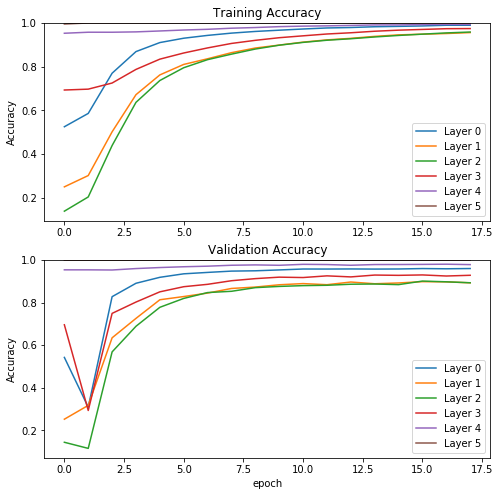

In [22]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
for i in range(6):
    plt.plot(train_acc[i], label='Layer {}'.format(i))
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy')

plt.subplot(2, 1, 2)
for i in range(6):
    plt.plot(val_acc[i], label='Layer {}'.format(i))
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Validation Accuracy')

plt.xlabel('epoch')
plt.show()

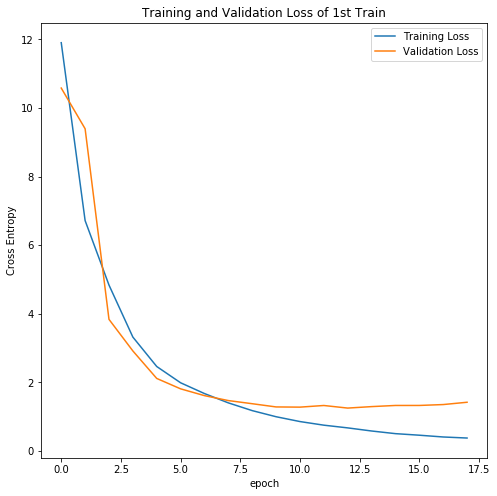

In [23]:
plt.figure(figsize=(8, 8))

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss of 1st Train')
plt.xlabel('epoch')
plt.show()

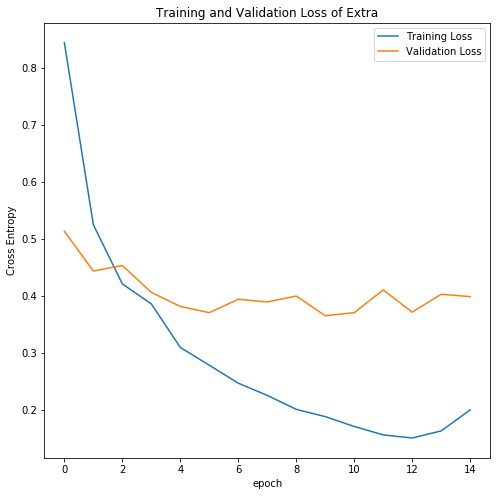

In [24]:
train_loss = history_extra.history['loss']
val_loss = history_extra.history['val_loss']

plt.figure(figsize=(8, 8))

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss of Extra')
plt.xlabel('epoch')
plt.show()

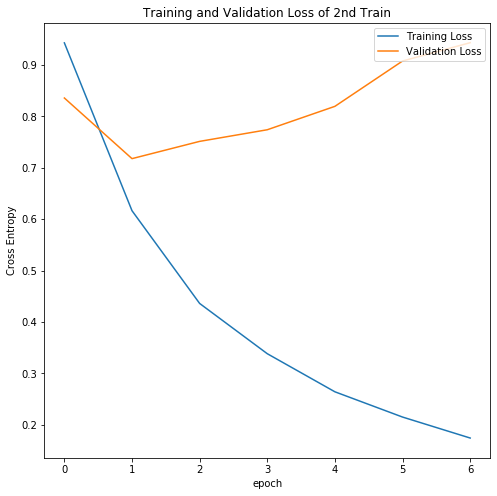

In [25]:
train_loss = history_train2.history['loss']
val_loss = history_train2.history['val_loss']

plt.figure(figsize=(8, 8))

plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')

plt.title('Training and Validation Loss of 2nd Train')
plt.xlabel('epoch')
plt.show()

In [26]:
tf.keras.models.save_model(model, 'models/dense_extra')